# Predict Closing Stock Price of an Action using LSTM Model

Using the past 60 days of data the model will predict the next closing price.

In [47]:
import math #Math Operations
import pandas_datareader as web #Get data
import numpy as np #Matrix operation
import pandas as pd #Dataframes
from sklearn.preprocessing import MinMaxScaler #Normalization
from tensorflow.keras.models import Sequential #Deep Learning Model
from tensorflow.keras.layers import Dense, LSTM #LSTM Model
import matplotlib.pyplot as plt #Graphs
import datetime #Today's date
from sklearn.metrics import mean_squared_error #RMSE ERROR

In [48]:
#Get the data of Apple Corp. Using yahoo finance as source and last 5 years

corp="Google"
name='GOOG'
today=datetime.datetime.now().strftime("%Y-%m-%d")
df=web.DataReader(name,
                  data_source='yahoo',
                  start="2015-01-01",
                  end=today)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-17,2133.659912,2098.919922,2100.000000,2128.310059,1070100.0,2128.310059
2021-02-18,2132.735107,2103.709961,2110.389893,2117.199951,1121600.0,2117.199951
2021-02-19,2130.530029,2097.409912,2119.270020,2101.139893,1457400.0,2101.139893
2021-02-22,2091.419922,2062.139893,2067.000000,2064.879883,1366200.0,2064.879883
2021-02-23,2082.010010,2002.020020,2025.010010,2070.860107,1621538.0,2070.860107


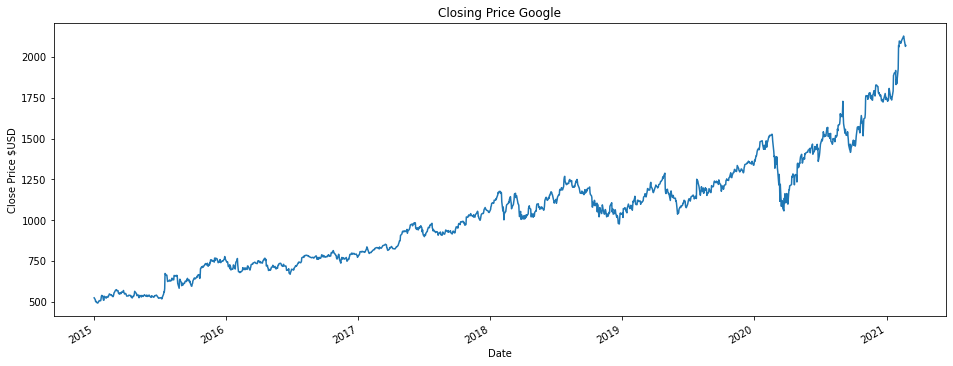

In [49]:
#Plot of closing Price
ax=df['Close'].plot(figsize=(16,6),title=f"Closing Price {corp}",
                   xlabel="Date",ylabel="Close Price $USD")

In [50]:
#Shape of dataframe
df.shape

(1546, 6)

In [51]:
#Split train dataset and testing.Training (80%). Test (20%)
dataset=df.filter(['Close']).values
#n rows to train
n_rows=int(math.ceil(len(dataset))*.8)
n_rows

1236

In [52]:
#Till this date the model is training after is testing
endTraining=df.iloc[n_rows].name.strftime("%Y-%m-%d")
endTraining

'2019-11-29'

In [53]:
#Preprocessing data -> scaler [0,1] closing price 1 max value. 0 Min Value

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01965153],
       [0.01298729],
       [0.00573219],
       ...,
       [0.98340357],
       [0.96125475],
       [0.96490767]])

In [54]:
#Create the train dataset
train_data=scaled_data[0:n_rows,:]

In [55]:
#Split train dataset into X and y

def split_x_and_y_train(train_data):
    """

    Using the last 60 days, we predict the present value (xt)

    X[t]=[xt-60,xt-59,...,xt-1]
    y[t]=xt

    X[t+1]=[xt-59,xt-58,..,xt-1,xt]
    y[t]=xt+1

    t=0 to len(train_data)

    """
    x_train=[]
    y_train=[]

    for i in range(60,len(train_data)):
        x_values=train_data[i-60:i,0]
        x_train.append(x_values)
        y_train.append(train_data[i,0])
        #Visualize first x_train and y_train
        if i==61:
            print(x_train)
            print(y_train)
    return np.array(x_train),np.array(y_train)

x_train,y_train=split_x_and_y_train(train_data)

[array([0.01965153, 0.01298729, 0.00573219, 0.00520832, 0.0061708 ,
       0.00220515, 0.        , 0.00221125, 0.00506821, 0.00562864,
       0.00946025, 0.00874145, 0.01552751, 0.02548725, 0.0288742 ,
       0.0259868 , 0.01588692, 0.01062985, 0.01103189, 0.02556648,
       0.02188713, 0.0223501 , 0.01840272, 0.02133889, 0.02342222,
       0.02149119, 0.02704062, 0.02644973, 0.03068951, 0.03439321,
       0.03063467, 0.0287219 , 0.03065294, 0.02826504, 0.02397654,
       0.02652284, 0.03126213, 0.03833447, 0.04011321, 0.04799576,
       0.04939683, 0.04923234, 0.05042631, 0.04576927, 0.04647893,
       0.03804818, 0.03571509, 0.03835274, 0.03336373, 0.03774358,
       0.03550795, 0.04078328, 0.03986345, 0.04130717, 0.04036296,
       0.04729523, 0.04034775, 0.03814563, 0.03398508, 0.03623287]), array([0.01298729, 0.00573219, 0.00520832, 0.0061708 , 0.00220515,
       0.        , 0.00221125, 0.00506821, 0.00562864, 0.00946025,
       0.00874145, 0.01552751, 0.02548725, 0.0288742 , 0.02

In [56]:
#Check shapes of training datasets
x_train.shape,y_train.shape

((1176, 60), (1176,))

In [57]:
#Reshape to 3 dimmension tensor for lstm model
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1176, 60, 1)

In [58]:
#Build the LSTM model

model=Sequential()
model.add(
    LSTM(100,
         return_sequences=True,
         input_shape=(x_train.shape[1],1))) #100 neurons first lstm layer return true because next later is a lstm too
model.add(LSTM(50,return_sequences=False))  #50 neurons first lstm layer return false because next later is not a lstm
model.add(Dense(25)) #Layer of 25 neurons full connected
model.add(Dense(1)) #1 output (predicted value)

#Compile the model
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
#Train the model

batch_size=5 #Total data examples/batch_size -> data model gonna see in each epoch
epochs=10 #Number iterations 

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
236/236 [==============================] - 16s 26ms/step - loss: 0.0044
Epoch 2/10
236/236 [==============================] - 6s 25ms/step - loss: 4.2348e-04
Epoch 3/10
236/236 [==============================] - 6s 25ms/step - loss: 3.1095e-04
Epoch 4/10
236/236 [==============================] - 6s 25ms/step - loss: 3.0365e-04
Epoch 5/10
236/236 [==============================] - 6s 25ms/step - loss: 2.4164e-04
Epoch 6/10
236/236 [==============================] - 6s 26ms/step - loss: 1.8935e-04
Epoch 7/10
236/236 [==============================] - 6s 26ms/step - loss: 1.8379e-04
Epoch 8/10
112/236 [=============>................] - ETA: 3s - loss: 1.8417e-04

In [ ]:
#Test the Model

#Create the testing dataset

test_data=scaled_data[n_rows-60:,:] #Rest 60 to get y value from first point

#Get x_test, y_test
x_test,y_test=split_x_and_y_train(test_data)
y_test=dataset[n_rows:,:]


#Reshape x_test
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape,y_test.shape

In [ ]:
#Get the predicted closing price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#Evaluate the model using the root mean squared error (RMSE)

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200622171741/RMSE1.jpg" />

In [ ]:
#RMSE Using ScikitLearn
rmse=mean_squared_error(y_test,predictions,squared=False)
rmse

In [ ]:
#Let's see the data and predictions
data=df.filter(['Close'])
train=data[:n_rows]
valid=data[n_rows:]
valid['Predictions']=predictions
valid

In [ ]:
#PLot data and predictions
plt.figure(figsize=(16,6))
plt.title(f"Model Prediction {corp}",fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel("Close Price $USD",fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'])
plt.show()

In [ ]:
#Save the model

model.save(f"models/{name}.h5")


In [ ]:
#Save info of the training model in a json file

import json 
def write_json(data, filename='data.json'): 
    with open(filename,'w') as f: 
        json.dump(data, f, indent=4) 
        
with open('data.json') as json_file: 
    data = json.load(json_file) 
    temp = data['models'] 

    # python object to be appended 
    model = {
        'corp':corp,
        'name':name,
        'startTraining':'2015-01-01',
        'endTraining':endTraining,
        'n_rows':n_rows,
        'model':f"{name}.h5",
        'rmse':rmse,
    }

    # appending data to emp_details  
    temp.append(model) 
      
write_json(data)  